# Pandas: een inleiding
### K. Verbeeck, T. Vermeulen, J. Maervoet
Data Science (Theory) -- OGI02i

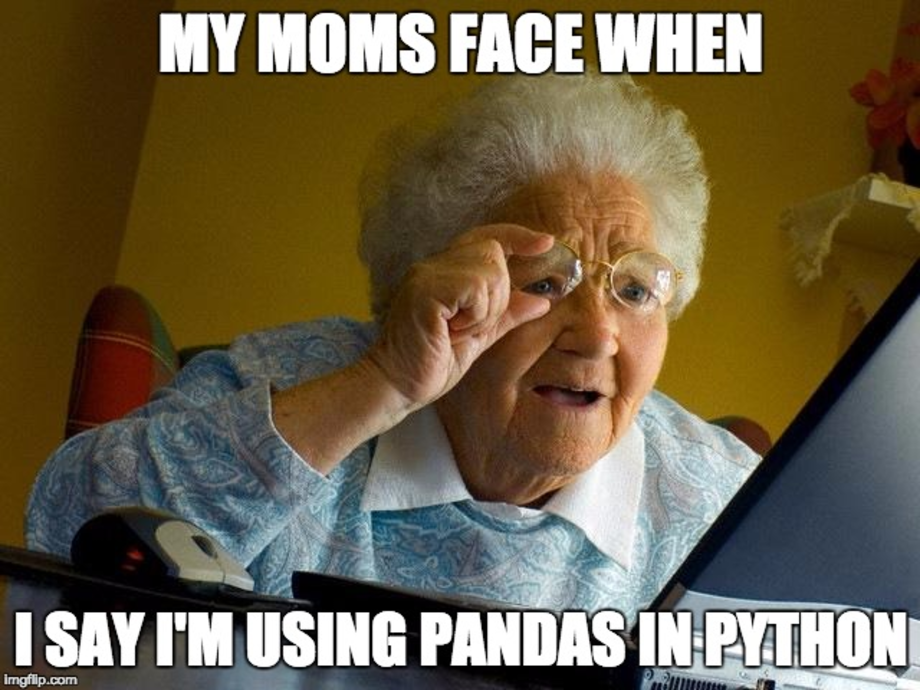

### De Pandas library
* Performante ondersteuning voor datamanipulatie en data-analyse
* Belangrijkste datastructuur: _DataFrame_ (typisch tabulaire gelabelde data)
* Maakt gebruik van en integreert met NumPy (!)
* __[Getting Started](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)__ met __[10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)__ en __[Basic Functionality](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html)__
* __[tutorialpoint's Pandas Tutorial](https://www.tutorialspoint.com/python_pandas/index.htm)__

### Data Science context
* Hoe gaan we praktisch te werk? Methodologie ~ stappenplan
* Verschillende modellen

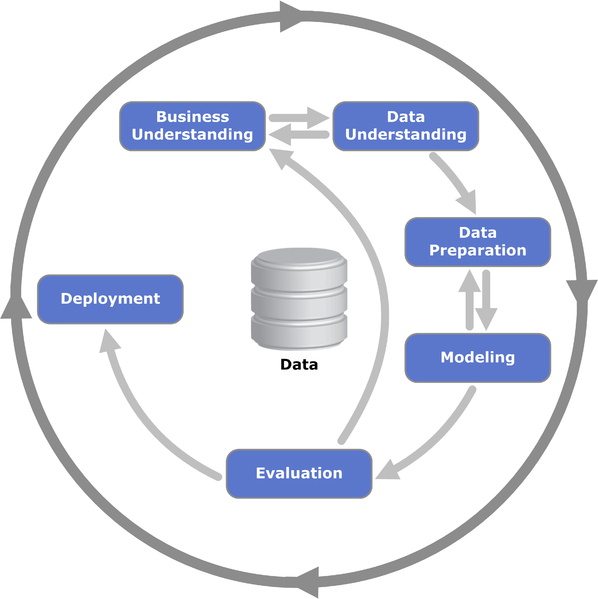
_Cross-industry standard process for data mining (CRISP-DM)_


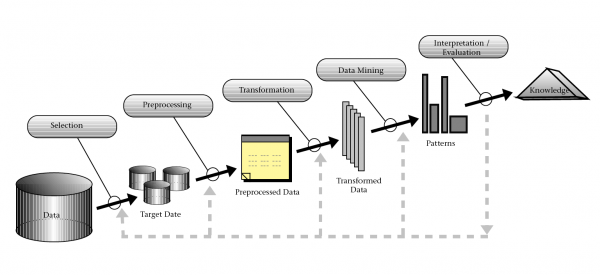
Uit: Usama Fayyad , Gregory Piatetsky-shapiro, Padhraic Smyth, __From Data Mining to Knowledge Discovery in Databases__, AI Magazine, vol. 17, p. 37--54, 1996 


### Eenvoudige voorbeelden van de modeling

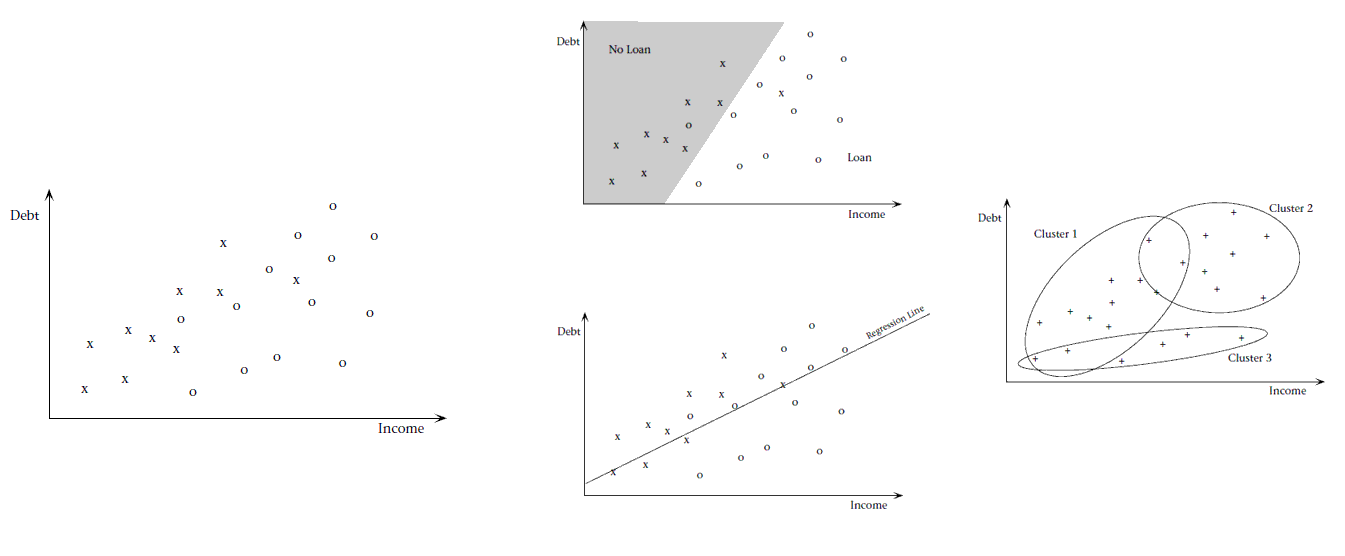

Dit geeft al een beeld van typische patronen die we kunnen ontdekken, maar een _echt_ Data Science probleem vertrekt vanuit een case/vraag

### Waar kan Pandas nuttig zijn?

* Toch vooral in de stappen __Data Understanding__ en __Data Preparation__
* Typische handelingen
  * Inladen van data (bv in tabelvorm)
  * Verkennen van ruwe data (ook descriptieve statistiek en visualiseren)
  * Subselecties maken in de data (bv feature selection)
  * Cleanen van data (bv behandelen missing values)
  * Combineren van data(sets)  

### Datastructuren Pandas

### Datastructuur #1: Series
* 1-dimensionaal
* homogene data
* afmetingen niet manipuleerbaar
* as-namen: _index_

In [1]:
import pandas as pd
data = ['a','b','c','d']
s = pd.Series(data) # je kan ook NumPy ndarrays gebruiken
print(s)

0    a
1    b
2    c
3    d
dtype: object


In [2]:
s = pd.Series(data,index=[100,101,102,103])
print(s)

100    a
101    b
102    c
103    d
dtype: object


In [3]:
dicti = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(dicti)
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


In [4]:
s = pd.Series(dicti,index=['b','c','d','a'])
print(s)
print(s[0:2]) # enkel bij niet-numerieke indices
print(s['b'])
print(s[['a', 'b']])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
b    1.0
c    2.0
dtype: float64
1.0
a    0.0
b    1.0
dtype: float64


In [5]:
s = pd.Series(5, index=[3, 4, 7, 8])
print(s)

3    5
4    5
7    5
8    5
dtype: int64


### Datastructuur #2: DataFrame
* 2-dimensionaal
* heterogene data
* ook afmetingen manipuleerbaar
* as-namen: _index_, _columns_

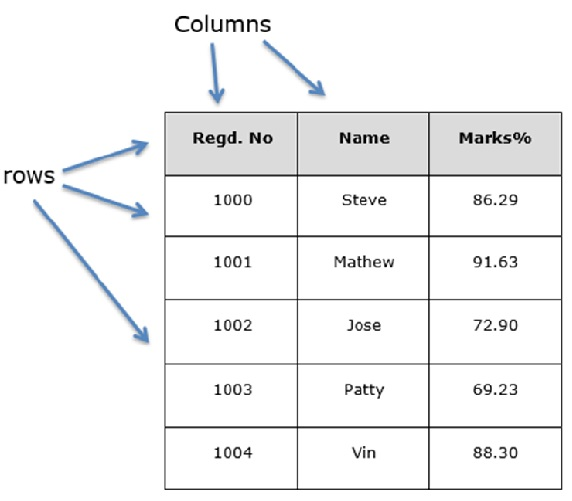



In [6]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
# je kan ook Pandas Series en NumPy ndarrays gebruiken
df = pd.DataFrame(data)
df

Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42

In [7]:
data = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
df

a   b     c
0  1   2   NaN
1  5  10  20.0

In [8]:
data = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

# index = rij-labels (moet overeenkomen met aantal rijen data)
# columns = kolom-labels (kan gebruikt worden voor selectie)
df = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b', 'd'])
df


a   b   d
first   1   2 NaN
second  5  10 NaN

In [9]:
# kolom-manipulatie
print(df['a'])
df['c'] = [5, 6]
print(df)
df['d'] = df['a'] + df['b']
print(df)

del df['d'] # kolom verrwijderen
print(df.pop('c')) # kolom 'poppen'

first     1
second    5
Name: a, dtype: int64
        a   b   d  c
first   1   2 NaN  5
second  5  10 NaN  6
        a   b   d  c
first   1   2   3  5
second  5  10  15  6
first     5
second    6
Name: c, dtype: int64


In [10]:
# rij-manipulatie
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df3 = df.append(df2)
df3

A  B
0  1  2
1  3  4
0  5  6
1  7  8

In [11]:
df3 = df3.drop(0)
df3

A  B
1  3  4
1  7  8

In [12]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df3 = df.append(df2, ignore_index=True) # beïnvloedt df niet !!
df3

A  B
0  1  2
1  3  4
2  5  6
3  7  8

In [13]:
# loc: indexing en slicing met labels
# iloc: indexing en slicing met index-getallen

df3.loc[1:] # slicing with unique row labels

A  B
1  3  4
2  5  6
3  7  8

In [14]:
print(df.loc[1, 'A'])
df.iloc[0,0] = 666
df

3


A  B
0  666  2
1    3  4

### Datastructuur #3: ...
* Deprecated: Panel (3-dimensionaal, heterogene data)
* Nu: MultiIndex (hierarchical indexing)

In [15]:
import pandas as pd
import numpy as np

# voorbeeld met impliciete constructie

lijst = [['2ICT1']*2+['2ICT2']*2, ['Jan', 'Piet', 'Joris', 'Corneel']]

df = pd.DataFrame(np.random.randn(4, 4), index=lijst)
df

0         1         2         3
2ICT1 Jan     -1.419993  0.256900  0.528267 -1.209640
      Piet     0.291921 -0.791343 -0.496474 -0.965830
2ICT2 Joris    0.192954 -0.449874  0.849330  0.851832
      Corneel -0.432307  1.367962  1.105110 -0.523683

### Let's take a look together &hellip;
* __[10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)__
* __[Pythonic Data Cleaning With NumPy and Pandas](https://realpython.com/python-data-cleaning-numpy-pandas/)__

<code>git clone https://github.com/realpython/python-data-cleaning.git</code>

Neem deze zaken écht door alvorens naar het labo te komen.

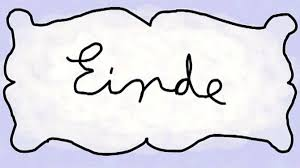